# Environmental Analytics Lecture 11
# Case Study: Multilabel landuse classification using Satellite Data
B. Schoen-Phelan

07-04-2022

Objectives:


*   Classify satellite data using fastai
*   Discuss CNN usage for satellite data


References:
 
1.   [Deep learning for Geospatial data applications — Multi-label Classification](https://medium.com/spatial-data-science/deep-learning-for-geospatial-data-applications-multi-label-classification-2b0a1838fcf3)
2.  [4 Types of Classification Tasks - a Tutorial](https://machinelearningmastery.com/types-of-classification-in-machine-learning/) 
3. [What is deep learning?](https://uk.mathworks.com/discovery/deep-learning.html)
4.   [About Train, Validation and Test Datasets in Machine Learning](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)
5.   [Simple Guide to Confusion Matrix Terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)


## Install necessary packages
[Fastai](https://docs.fast.ai/) is a python package that offers a quick way to use neural networks. Fastai offers a free online course that may be of interest to you if you want to know more about [deep learning](https://course.fast.ai/) for python.

Deep Learning is a subfield of machine learning concerned with algorithms inspired by the structure and function of the brain called artificial neural networks. It enables computers to learn by example, which is a process natural to humans.

It has gained significant popularity since we now have a large amount of unstructured data and deep learning techniques have proven to excell in this particular area. Additionally, most deep learning algorithms are able to exract features from raw data that needs very little preparation. Deep learning is successfully applied to unstructured data (images, text, sound). Models are trained by using a large set of labeled data and neural network architectures that contain many layers.

Deep learning typically requires large amounts of labelled data and substantial computing power using high performance GPUs and parallel architectures.

The term “deep” usually refers to the number of hidden layers in the neural network. Traditional neural networks only contain 2-3 hidden layers, while deep networks can have as many as 150 [2].
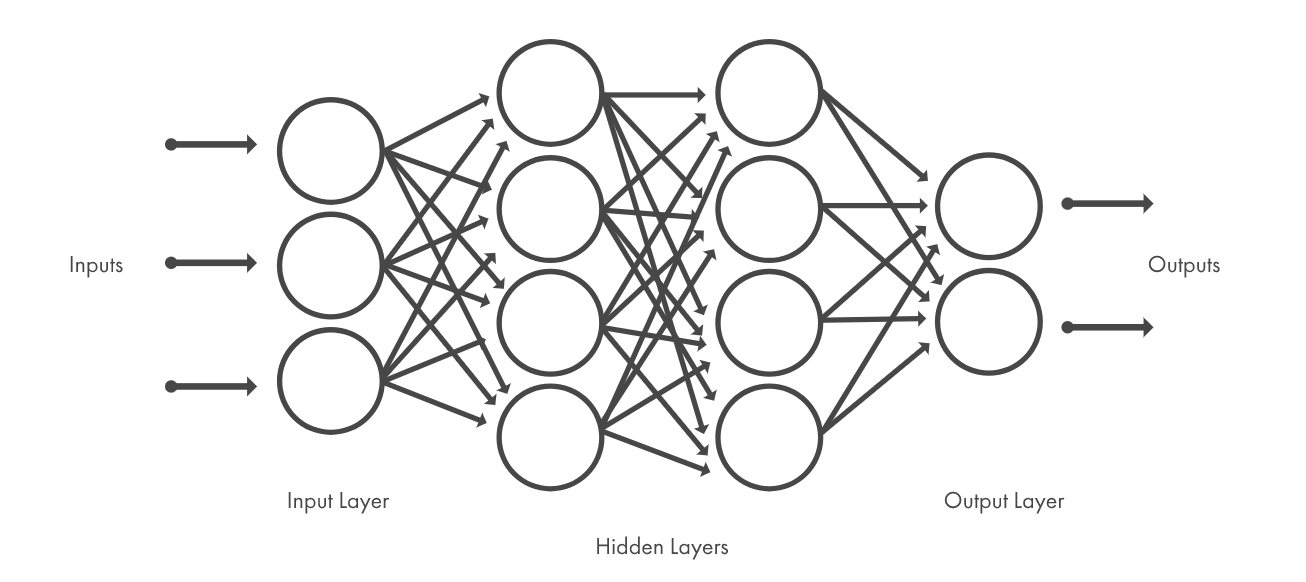
Figure: Neural networks, which are organized in layers consisting of a set of interconnected nodes. Networks can have tens or hundreds of hidden layers. [2]



### How to Create a Deep Learning Network

#### Training from Scratch


*   Needs a very large set of labelled data
*   The architecture will learng the features and the model
*   Can take days or weeks to train

#### Transfer Learning


*   Fine tuning a pre-trained model
*   Most common approach now
*  Start with pre-trained model and then feed new data containing new classes
*   Needs less labelled data
*   Needs less computing power, can be done in a few hours



In [1]:
# The standard installation of colab already has fastai installed.
# However, in order to use the latest features, use the latest version
# of fastai.

! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 188 kB 14.1 MB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 


In [2]:
from fastai.vision.all import *

## Retrieve and set up Data

The data we use is the [UC Merced land use dataset](http://weegee.vision.ucmerced.edu/datasets/landuse.html), the oldest and one of the popular land-use imagery datasets. This data consists of 100 images per class with 21 land use classes. 

In [3]:
!wget http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip

--2022-04-04 09:59:30--  http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip
Resolving weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)... 169.236.184.65
Connecting to weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)|169.236.184.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332468434 (317M) [application/zip]
Saving to: ‘UCMerced_LandUse.zip’

UCMerced_LandUse.zi 100%[===================>] 317.07M  17.6MB/s    in 28s     

2022-04-04 09:59:59 (11.2 MB/s) - ‘UCMerced_LandUse.zip’ saved [332468434/332468434]



In [4]:
!unzip UCMerced_LandUse.zip

Archive:  UCMerced_LandUse.zip
   creating: UCMerced_LandUse/Images/
   creating: UCMerced_LandUse/Images/agricultural/
  inflating: UCMerced_LandUse/Images/agricultural/agricultural00.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural01.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural02.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural03.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural04.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural05.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural06.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural07.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural08.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural09.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural10.tif  
  inflating: UCMerced_LandUse/Images/agricultural/agricultural11.tif  
  inflating: UCMerced_LandUs

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


As per usual, I recommend that you save this data set to somewhere on your own cloud.

In [18]:
!cp '/content/UCMerced_LandUse.zip' '/content/gdrive/My Drive/'

## Get to know your Data
This section uses many fastai functions. Please check with the [documentation](https://docs.fast.ai/) for all functions.

In [7]:
# First, we set up the path to the image folders. 
# Once we set up this, Fastai has a function that makes 
# getting file names for each image easy. 
# We call get_image_files() and provide the path we just created.

path = Path('/content/UCMerced_LandUse/Images')
items = get_image_files(path)
items

(#2100) [Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond85.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond83.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond73.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond49.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond48.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond88.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond66.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond12.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond70.tif'),Path('/content/UCMerced_LandUse/Images/baseballdiamond/baseballdiamond68.tif')...]

In [8]:
type(items)

fastcore.foundation.L

In [9]:
!ls '/content/UCMerced_LandUse/Images'

agricultural	 denseresidential  mediumresidential  sparseresidential
airplane	 forest		   mobilehomepark     storagetanks
baseballdiamond  freeway	   overpass	      tenniscourt
beach		 golfcourse	   parkinglot
buildings	 harbor		   river
chaparral	 intersection	   runway


Now, we need to create a DataBlock and load the data to [Pytorch](https://pytorch.org/docs/stable/index.html). 
PyTorch is an optimised tensor library for deep learning using GPUs and CPUs.

Please check out this brief overview comparing a GPU and a CPU and how this is important for machine learning and artificial intelligence. https://www.youtube.com/watch?v=XKOI9-G-wk8
Nowadays, we also use something called a TPU. For a comparison of all 3, please see here: https://serverguy.com/comparison/cpu-vs-gpu-vs-tpu/

### Preparation of the Datasets

See [3]

*   **Training Dataset**: The sample of data used to fit the model. The model sees and learns from this data.
*   **Validation Dataset**: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters. The evaluation becomes more biased as skill on the validation dataset is incorporated into the model configuration. he model occasionally sees this data, but never does it “Learn” from this. We use the validation set results, and update higher level hyperparameters. So the validation set affects a model, but only indirectly. 
*   **Test Dataset**: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. The Test dataset provides the gold standard used to evaluate the model. It is only used once a model is completely trained(using the train and validation sets). The test set is generally what is used to evaluate competing models. It is not good practice to use the validation dataset as a test set. The test set is generally well curated. It contains carefully sampled data that spans the various classes that the model would face, when used in the real world.



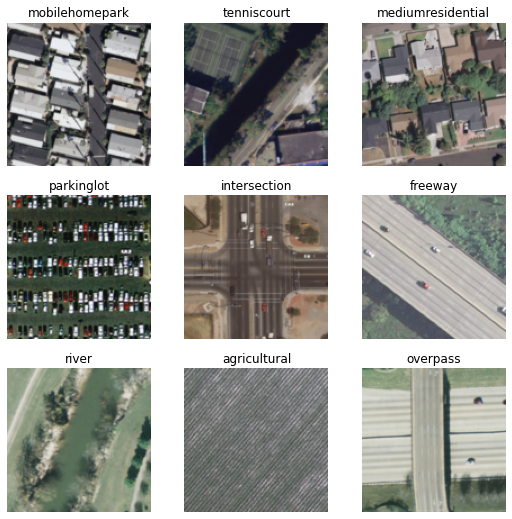

In [10]:
# The first command takes care of getting images from folders, 
# splitting them between training and validation datasets and 
# mapping the labels from the filenames in the folders.

# DataBlock is a generic container to quickly build Datasets and DataLoaders
# To build a DataBlock you need to give the library four things: 
# 1) the types of your input
# 2) the types of your labels, 
# 3) and at least two functions: get_items and splitter. 
# 4) You may also need to include get_x and get_y or a more generic 
# list of getters that are applied to the results of get_items.
# Once those are provided, you automatically get a Datasets or a DataLoaders

# the split is 30% validation
# a seed allows for reproducibilty. With a seed value the randomness 
# will be the same, no matter how many times you run this code
data = DataBlock(blocks=(ImageBlock, CategoryBlock),  get_items=get_image_files,  splitter=RandomSplitter(valid_pct=0.3, seed=42), get_y=parent_label, item_tfms=Resize(128))

# this loads the data and resizes them into an image of 128 by 128 pixels
dls = data.dataloaders(path, item_tfms=Resize(128))
dls.valid.show_batch()

## Train Deep learning Model (Transfer Learning)
Here we train a state of the art deep learning model for  geospatial data. It classifys satellite imagery into 21 different land use classes.

To train our Deep learning model, we need to create a learner and the model (with fine-tuning it). A lot of computations, parameters and architectures are running behind the scene (see background info at start of the notebook for learning more about the background of CNN).

Here, we use a [ResNet-18](https://uk.mathworks.com/help/deeplearning/ref/resnet18.html). ResNet-18 is a convolutional neural network that is 18 layers deep. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. ImageNet is unrelated to our data. Transfer learning performs well once applied to another dataset and fine-tuned to the current purpose at hand.

The training loss and validation loss decreases after each epoch (5 epochs in total). More importantly, the error rate is our metric and shows the percentage of error in each epoch(=iteration). Our last error rate indicates to be around 0.080 (or in terms of accuracy 92% accurate). 

Training loss is the error on the training set of data. Validation loss is the error after running the validation set of data through the trained network. Train/valid is the ratio between the two. As the epochs increase both validation and training error drop

In [11]:
# Create a learner:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

# Run the model
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

We can improve the results by running more epochs, fine-tuning the model, increasing the parameters of the model, freezing layers etc, most of which are advanced topics and not scope of this module.

## Interpretation

A Confusion Matrix is a performance measurement for machine learning classification. A confusion matrix is a visual way to interpret how a model is performing. The confusion matrix compares the predicted class with the actual class.

This is a very important step of your deep learning project!

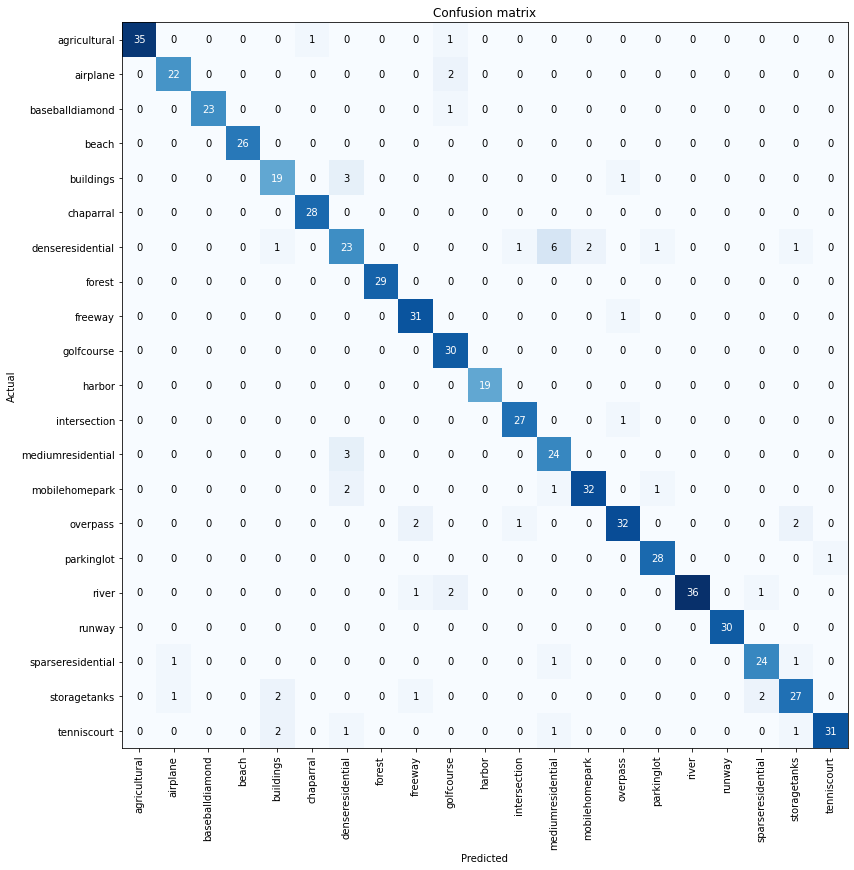

In [12]:
# create classificaiton interpretation
interp = ClassificationInterpretation.from_learner(learn)

# plot a confusion matrix
interp.plot_confusion_matrix(figsize=(12,12))

The diagonal elements represent the number of points for which the predicted label is **equal to the true label**, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

The most confused classes are the three different types of residential classes: dense residential, medium residential and sparse residential. This is obviously an issue of where to put the boundary line between these three different types of classes. In general, the model performs well with 1 or 2 misclassified images per class.

## Inference
In order to use other images and classify them, you can use your trained model to predict them. This is simply calling learn.predict() and providing the image you want to classify.

The following image is a aerlial photo of Santiago airport. You can copy the image from this notebook, then save it and upload it to the left content pane.

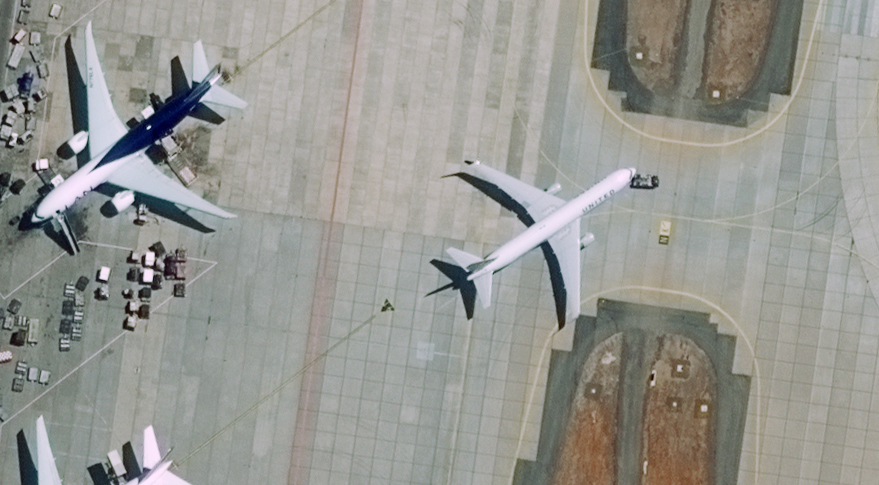



In [19]:
learn.predict("/content/picture.jpg")[0]

'airplane'

Let's try a few images. The following are google Earth images of Howth Harbour. In order to run the following cells you need to download the images and upload them to the left content pane as `picture1.jpg` and `picture2.jpg`. The first image will be missclassified. The second image will be classified correclty. Examine the images and determine what is the difference between them.

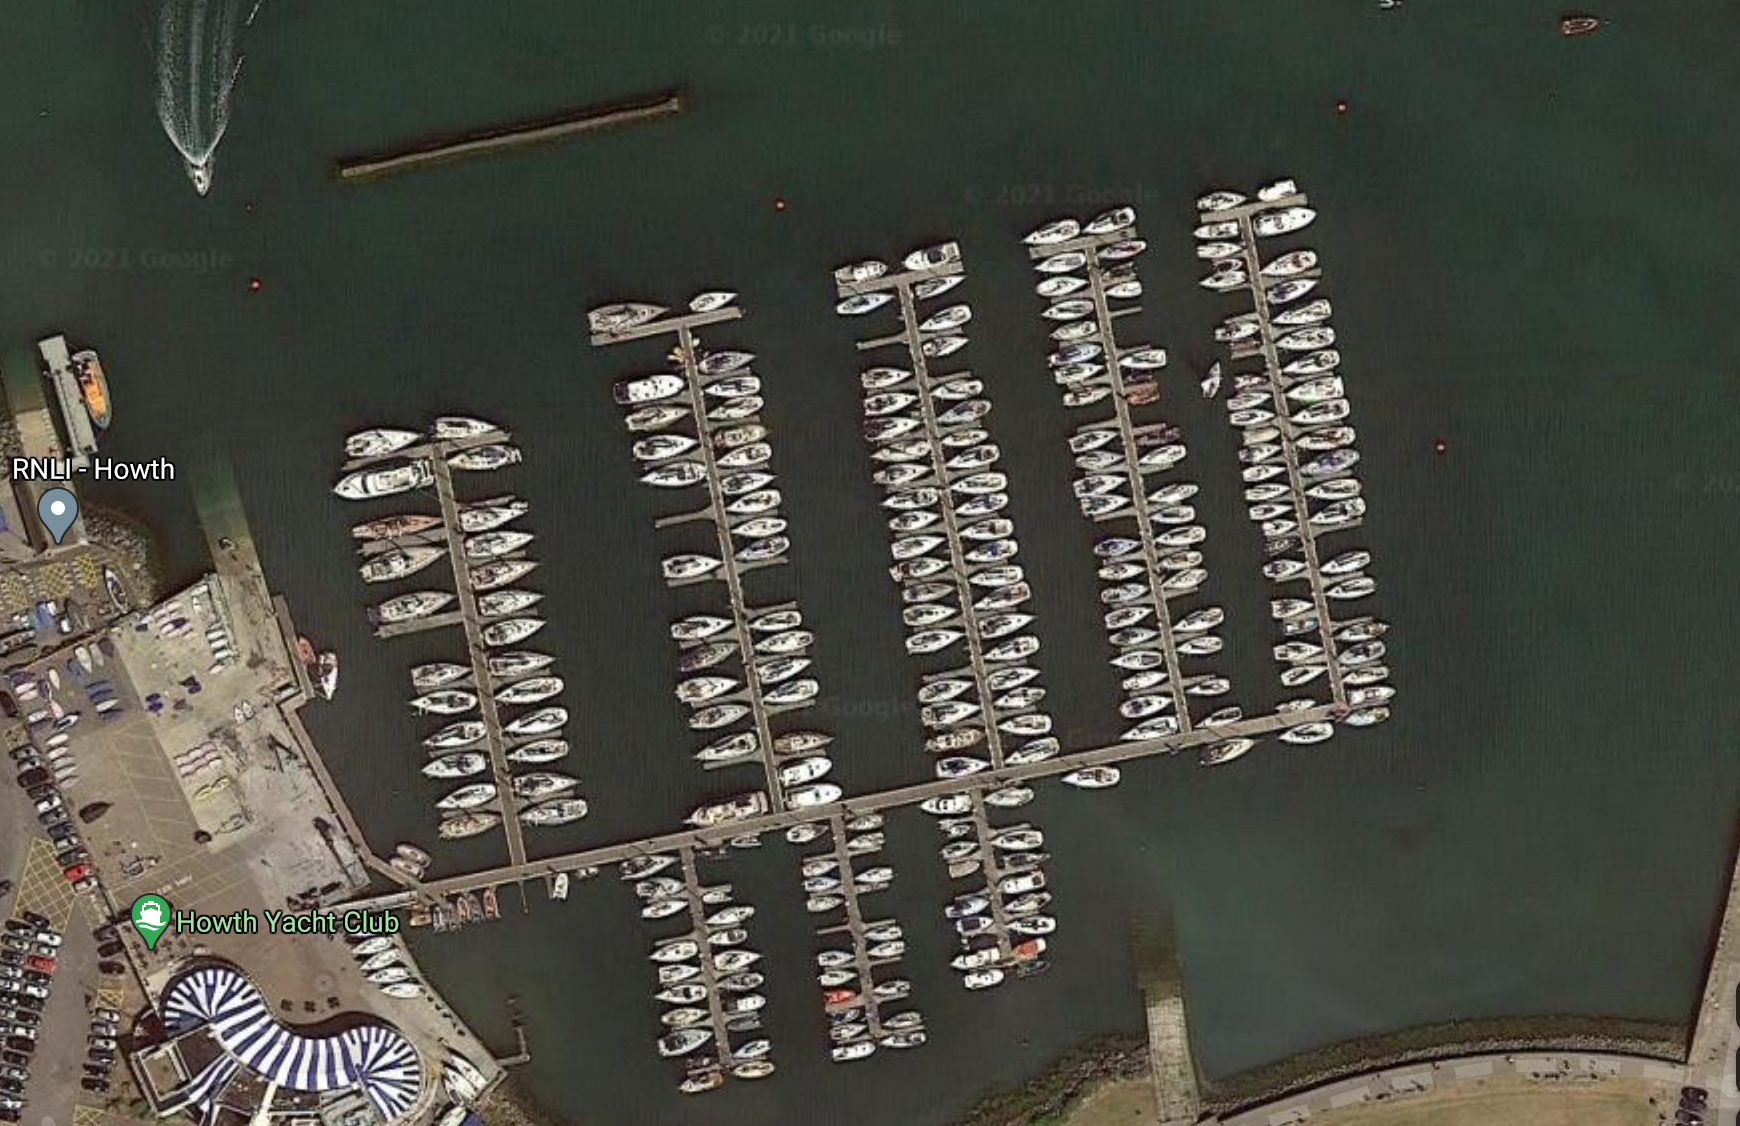

In [16]:
# learn.predict("/content/30_centimeter_satellite_imagery_CHL_Santiago_Airport_1.jpg")[0]
learn.predict("/content/picture1.jpg")[0]

'parkinglot'

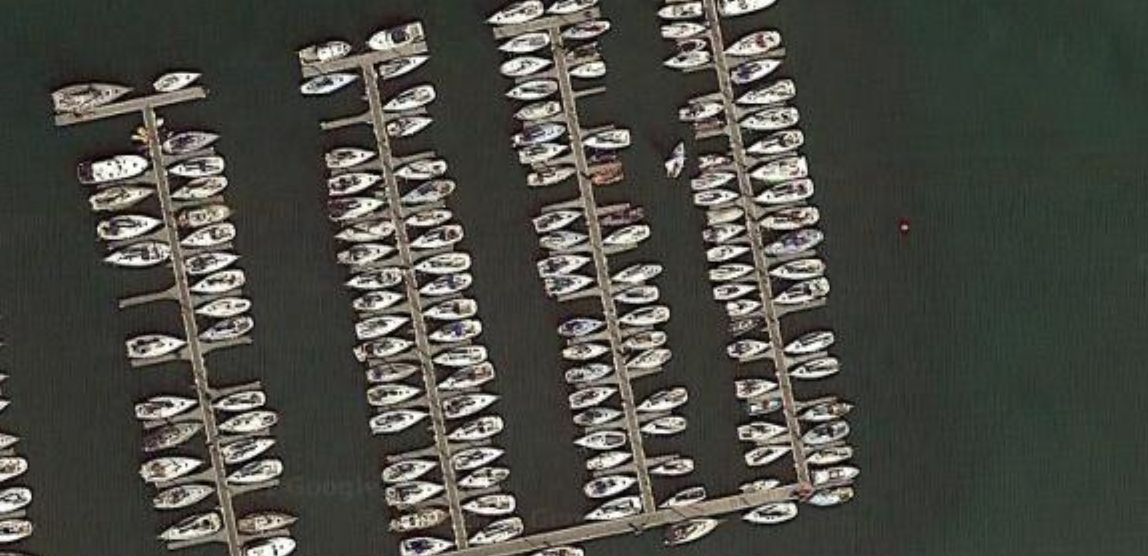

In [17]:
learn.predict("/content/picture2.jpg")[0]

'harbor'

# Task
Try a few images of your own!